# EDA

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import MarkerCluster

In [62]:
df = pd.read_csv('data_klinik_psikologi_Indonesia.csv')

In [63]:
df

,name,category,addres_full,website,phone_number,rating,review_count,longitude,latitude,provinsi
0,Ritz Consultant Psikologi (Praktek Psikolog),Psychologist,"Ritz Consultant Psikologi (Praktek Psikolog), ...",tidak diketahui,+62 811-6809-330,5,26.0,"95,3441249","5,5741121",Aceh
1,Sanubari Psikologi (Praktik Psikolog Cut Maghf...,Psychologist,Sanubari Psikologi (Praktik Psikolog Cut Maghf...,https://www.instagram.com/sanubari.psi/,+62 895-3411-74100,5,50.0,"95,3240021","5,5475893",Aceh
2,"Klinik Psikologi Seedtosparkle (Firsta Faizah,...",Psychologist,"Klinik Psikologi Seedtosparkle (Firsta Faizah,...",https://www.instagram.com/yourpsychologist_fir...,+62 811-6841-662,5,44.0,"95,3487201","5,5716962",Aceh
3,Psikodista Consultant,Psychologist,"Psikodista Consultant, JL. T. Imum Luengbata. ...",http://www.psikodista.com/,+62 651 26245,"4,7",43.0,"95,3361829","5,5437292",Aceh
4,Yayasan Praktek Psikolog Indonesia Cabang Aceh,Psychologist,G7MX+58J Yayasan Praktek Psikolog Indonesia Ca...,tidak diketahui,tidak diketahui,5,3.0,"95,2977906","5,5328705",Aceh
...,...,...,...,...,...,...,...,...,...,...
1045,Rumah Arkacanti Holistic Care,Psychologist,"Rumah Arkacanti Holistic Care, Jl Imogiri Timu...",tidak diketahui,+62 812-2550-5396,5,4.0,"110,3907158","-7,8503604",Yogyakarta
1046,DERIRA THE COUNSELLOR,Psychologist,"7757+98H DERIRA THE COUNSELLOR, Jl. Gedongan-T...",tidak diketahui,+62 813-9169-9601,5,2.0,"110,2633541","-7,7415716",Yogyakarta
1047,Hypnoclinic Jogja,Psychotherapist,"Hypnoclinic Jogja, Green Aprillia Estate, Gamp...",tidak diketahui,+62 815-7870-8444,5,3.0,"110,3195813","-7,8024347",Yogyakarta
1048,Konsultan Psikologi,Psychologist,"Konsultan Psikologi, Jl. Pura, RT.03/RW.No 72,...",tidak diketahui,+62 812-4973-5793,"4,8",108.0,"110,3308547","-7,8243541",Yogyakarta


### Informasi Umum Data

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1050 non-null   object 
 1   category      1050 non-null   object 
 2   addres_full   1050 non-null   object 
 3   website       1050 non-null   object 
 4   phone_number  1050 non-null   object 
 5   rating        1050 non-null   object 
 6   review_count  1050 non-null   float64
 7   longitude     1050 non-null   object 
 8   latitude      1050 non-null   object 
 9   provinsi      1050 non-null   object 
dtypes: float64(1), object(9)
memory usage: 82.2+ KB


In [65]:
df.describe(include='all')

,name,category,addres_full,website,phone_number,rating,review_count,longitude,latitude,provinsi
count,1050,1050,1050,1050,1050,1050,1050.000000,1050,1050,1050
unique,935,9,941,355,792,42,NaN,941,940,38
top,AMG CLINIC - Klinik Tumbuh Kembang Anak & Klin...,Psychologist,tidak diketahui,tidak diketahui,tidak diketahui,5,NaN,"106,866219","-6,254155",Jawa Tengah
freq,5,886,4,600,101,497,NaN,3,4,142
mean,NaN,NaN,NaN,NaN,NaN,NaN,40.260952,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,190.834944,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,NaN,NaN,NaN


In [66]:
df.nunique()

name            935
category          9
addres_full     941
website         355
phone_number    792
rating           42
review_count    135
longitude       941
latitude        940
provinsi         38
dtype: int64

In [67]:
nama_dihapus = ['Lembaga Layanan Psikologi GSP Kebumen', 'Psikologi Klinis Mataram']

df = df[~df['name'].isin(nama_dihapus)]

print(df[df['name'].isin(nama_dihapus)])  

Empty DataFrame
Columns: [name, category, addres_full, website, phone_number, rating, review_count, longitude, latitude, provinsi]
Index: []


In [68]:
df['addres_full'] = df['addres_full'].str.lower()

def deteksi_provinsi(alamat):
    if pd.isna(alamat):
        return None

    alamat = alamat.lower()

    provinsi_keywords = {
        'aceh': 'Aceh',
        'sumatera utara': 'Sumatera Utara',
        'sumatera barat': 'Sumatera Barat',
        'riau': 'Riau',
        'kepulauan riau': 'Kepulauan Riau',
        'jambi': 'Jambi',
        'sumatera selatan': 'Sumatera Selatan',
        'bengkulu': 'Bengkulu',
        'lampung': 'Lampung',
        'bangka belitung': 'Kepulauan Bangka Belitung',
        'jakarta': 'DKI Jakarta',
        'jawa barat': 'Jawa Barat',
        'bandung': 'Jawa Barat',
        'jawa tengah': 'Jawa Tengah',
        'semarang': 'Jawa Tengah',
        'diy': 'DI Yogyakarta',
        'yogyakarta': 'DI Yogyakarta',
        'jawa timur': 'Jawa Timur',
        'surabaya': 'Jawa Timur',
        'banten': 'Banten',
        'bali': 'Bali',
        'ntb': 'NTB',
        'nusa tenggara barat': 'NTB',
        'ntt': 'Nusa Tenggara Timur',
        'nusa tenggara timur': 'NTT',
        'kalimantan barat': 'Kalimantan Barat',
        'kalimantan tengah': 'Kalimantan Tengah',
        'kalimantan selatan': 'Kalimantan Selatan',
        'kalimantan timur': 'Kalimantan Timur',
        'kalimantan utara': 'Kalimantan Utara',
        'sulawesi utara': 'Sulawesi Utara',
        'sulawesi tengah': 'Sulawesi Tengah',
        'sulawesi selatan': 'Sulawesi Selatan',
        'sulawesi tenggara': 'Sulawesi Tenggara',
        'sulawesi barat': 'Sulawesi Barat',
        'gorontalo': 'Gorontalo',
        'maluku': 'Maluku',
        'maluku utara': 'Maluku Utara',
        'jayapura': 'Papua',
        'papua barat': 'Papua Barat',
        'papua tengah': 'Papua Tengah',
        'papua pegunungan': 'Papua Pegunungan',
        'merauke': 'Papua Selatan',
        'West Papua': 'Papua Barat Daya',
    }

    for keyword, prov in provinsi_keywords.items():
        if keyword in alamat:
            return prov

    return None

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_22644\3025204644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['addres_full'] = df['addres_full'].str.lower()


In [69]:
df['provinsi_dari_alamat'] = df['addres_full'].apply(deteksi_provinsi)

df['provinsi'] = df['provinsi_dari_alamat'].combine_first(df['provinsi'])

df = df.drop(columns='provinsi_dari_alamat')

df = df.drop_duplicates(subset='name', keep='first')

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_22644\4141685079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['provinsi_dari_alamat'] = df['addres_full'].apply(deteksi_provinsi)
C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_22644\4141685079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['provinsi'] = df['provinsi_dari_alamat'].combine_first(df['provinsi'])


In [70]:
df.isnull().sum()

name            0
category        0
addres_full     0
website         0
phone_number    0
rating          0
review_count    0
longitude       0
latitude        0
provinsi        0
dtype: int64

In [71]:
# Mapping nama yang akan dirapikan
rename_map = {
    "Biro Psikologi & Konsultan HRD PT Tridi Talenta Indonesia (konsultasi & konseling dengan psikolog profesional": "Tridi Talenta Indonesia",
    "Firdaus Amany Psychological Centre (Dengan Perjanjian melalui Whatsapp)": "Firdaus Amany Psychological Centre",
    "CHC CIBUBUR [Lembaga Psikologi KLINIS & Hipnoterapi] ~ WARUNG SEHAT CINTA": "CHC Cibubur",
    "PSIKOLOG KLINIS MALANG ( Dr. (Cand) Tri Wiganti Andayani, S.Psi., M.Psi., Psikolog) RUMAH PSIKOLOGI WIGANTI": "Psikolog Klinis Malang – Rumah Psikologi Wiganti",
    "Praktek Psikolog Hasri Ardilla, S.Psi., M.Psi., Psikolog (Hasiera Consulting) dan Rumah Terapi Anak Berkebutuhan Khusus": "Hasiera Consulting",
    "Biro Analisa Sidik Jari & Psikolog ( Penanggung Jawab : Ir.Arief Yunarto,Ak,M.Psi )": "Biro Analisa Sidik Jari & Psikolog",
    "Klinik Konseling dan Hipnoterapi Nicolas Han di Kota Malang": "Klinik Konseling dan Hipnoterapi Nicolas Han",
    "Praktek dr. Ezra Eben, SpKJ (menghubungi hanya bisa lewat WA chat, tidak menerima telpon)": "Praktek dr. Ezra Eben, SpKJ"
}

# Drop daftar ini
drop_list = [
    "Pusat Kajian dan Asesmen Psikologi IAIN Tulungagung",
    "Tes Stifin Makassar Gowa Samata (potensi bakat karakter GENETIK )"
]

# Rename nama-nama yang perlu disederhanakan
df['name'] = df['name'].replace(rename_map)

# Drop nama-nama yang tidak diperlukan
df = df[~df['name'].isin(drop_list)]

In [72]:
df

,name,category,addres_full,website,phone_number,rating,review_count,longitude,latitude,provinsi
0,Ritz Consultant Psikologi (Praktek Psikolog),Psychologist,"ritz consultant psikologi (praktek psikolog), ...",tidak diketahui,+62 811-6809-330,5,26.0,"95,3441249","5,5741121",Aceh
1,Sanubari Psikologi (Praktik Psikolog Cut Maghf...,Psychologist,sanubari psikologi (praktik psikolog cut maghf...,https://www.instagram.com/sanubari.psi/,+62 895-3411-74100,5,50.0,"95,3240021","5,5475893",Aceh
2,"Klinik Psikologi Seedtosparkle (Firsta Faizah,...",Psychologist,"klinik psikologi seedtosparkle (firsta faizah,...",https://www.instagram.com/yourpsychologist_fir...,+62 811-6841-662,5,44.0,"95,3487201","5,5716962",Aceh
3,Psikodista Consultant,Psychologist,"psikodista consultant, jl. t. imum luengbata. ...",http://www.psikodista.com/,+62 651 26245,"4,7",43.0,"95,3361829","5,5437292",Aceh
4,Yayasan Praktek Psikolog Indonesia Cabang Aceh,Psychologist,g7mx+58j yayasan praktek psikolog indonesia ca...,tidak diketahui,tidak diketahui,5,3.0,"95,2977906","5,5328705",Aceh
...,...,...,...,...,...,...,...,...,...,...
1044,Praktik Psikologi Lostid,Psychotherapist,"praktik psikologi lostid, pondok indah kalasan...",tidak diketahui,tidak diketahui,5,5.0,"110,4641118","-7,7261055",DI Yogyakarta
1045,Rumah Arkacanti Holistic Care,Psychologist,"rumah arkacanti holistic care, jl imogiri timu...",tidak diketahui,+62 812-2550-5396,5,4.0,"110,3907158","-7,8503604",DI Yogyakarta
1046,DERIRA THE COUNSELLOR,Psychologist,"7757+98h derira the counsellor, jl. gedongan-t...",tidak diketahui,+62 813-9169-9601,5,2.0,"110,2633541","-7,7415716",DI Yogyakarta
1047,Hypnoclinic Jogja,Psychotherapist,"hypnoclinic jogja, green aprillia estate, gamp...",tidak diketahui,+62 815-7870-8444,5,3.0,"110,3195813","-7,8024347",DI Yogyakarta


In [73]:
filtered_df = df[df['name'].str.contains('sim', case=False, na=False)]

In [74]:
filtered_df

,name,category,addres_full,website,phone_number,rating,review_count,longitude,latitude,provinsi
49,Tes psilologi SIM,Psychologist,"v3ww+q56 tes psilologi sim, kp. baru, kec. bul...",tidak diketahui,tidak diketahui,2,5.0,"115,0953809","-8,1030869",Bali
426,Test Psikologi SIM Batang (Test Kesehatan Roha...,Psychologist,3prj+pcg test psikologi sim batang (test keseh...,tidak diketahui,tidak diketahui,4,5.0,"109,7310785","-6,9081944",Jawa Tengah
428,Tes Psikologi SIM,Psychotherapist,"tes psikologi sim, jl. prof. moh. yamin no.5, ...",tidak diketahui,tidak diketahui,"4,5",2.0,"110,9494854","-7,5950417",Jawa Tengah
439,Tes Psikologi Pemohon SIM Magelang Kota,Psychologist,"tes psikologi pemohon sim magelang kota, jl. k...",tidak diketahui,tidak diketahui,5,4.0,"110,2145651","-7,4762786",Jawa Tengah
459,Tempat test psikologi SIM,Psychotherapist,"tempat test psikologi sim, jl. bhayangkara no....",tidak diketahui,tidak diketahui,1,2.0,"110,6349779","-6,8929198",Jawa Tengah
576,Psykologi SIM MPBKP Bangil,Psychologist,"psykologi sim mpbkp bangil, jalan dokter soeto...",tidak diketahui,tidak diketahui,5,1.0,"112,7949434","-7,6038021",Jawa Timur
597,Tes Psikologi SIM Satlantas Polres Gresik,Psychologist,"tes psikologi sim satlantas polres gresik, jl....",tidak diketahui,tidak diketahui,"4,5",2.0,"112,6248702","-7,16237",Jawa Timur
604,Psikotest SIM Kota Batu,Psychologist,"psikotest sim kota batu, junrejo, kec. junrejo...",https://instagram.com/tespsikologisim.batu?utm...,tidak diketahui,5,6.0,"112,5533696","-7,9062564",Jawa Timur
624,Tes PSIKOLOGI untuk permohonan SIM,Psychologist,"97fp+cfh tes psikologi untuk permohonan sim, l...",tidak diketahui,tidak diketahui,5.0,1.0,109.286237,1.3735553,Kalimantan Barat
640,PELAYANAN UJI PSIKOLOGI SIM,Psychologist,"57x6+43v pelayanan uji psikologi sim, jl. jend...",tidak diketahui,tidak diketahui,5.0,1.0,115.2601724,-2.8021359,Kalimantan Selatan


In [75]:
df = df[~df['name'].str.contains('sim', case=False, na=False)]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          905 non-null    object 
 1   category      905 non-null    object 
 2   addres_full   905 non-null    object 
 3   website       905 non-null    object 
 4   phone_number  905 non-null    object 
 5   rating        905 non-null    object 
 6   review_count  905 non-null    float64
 7   longitude     905 non-null    object 
 8   latitude      905 non-null    object 
 9   provinsi      905 non-null    object 
dtypes: float64(1), object(9)
memory usage: 77.8+ KB


### Distribusi Rating dan Jumlah Ulasan

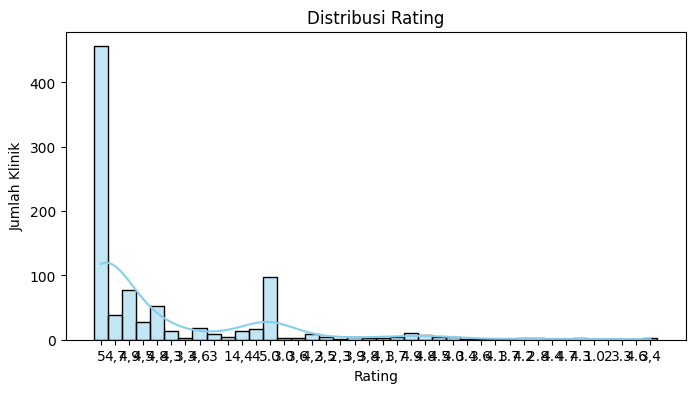

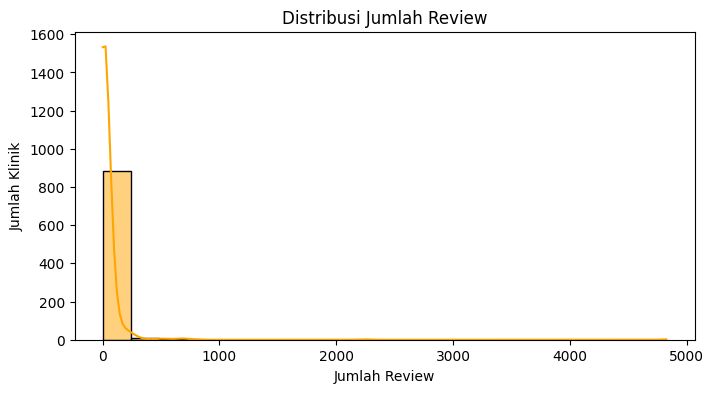

In [77]:
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Klinik')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['review_count'], bins=20, kde=True, color='orange')
plt.title('Distribusi Jumlah Review')
plt.xlabel('Jumlah Review')
plt.ylabel('Jumlah Klinik')
plt.show()


### Rata rata Rating dan Review per Provinsi

In [78]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['review_count'] = pd.to_numeric(df['review_count'], errors='coerce')

df.groupby('provinsi')[['rating', 'review_count']].mean()

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_22644\3926069183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_22644\3926069183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_count'] = pd.to_numeric(df['review_count'], errors='coerce')


,rating,review_count
provinsi,,
Aceh,5.000000,27.142857
Bali,4.653125,32.096154
Banten,4.967742,27.044444
Bengkulu,4.714286,15.777778
DI Yogyakarta,4.857143,27.063492
DKI Jakarta,4.968750,148.835616
Gorontalo,4.000000,7.000000
Jambi,5.000000,10.846154
Jawa Barat,4.872727,42.663366


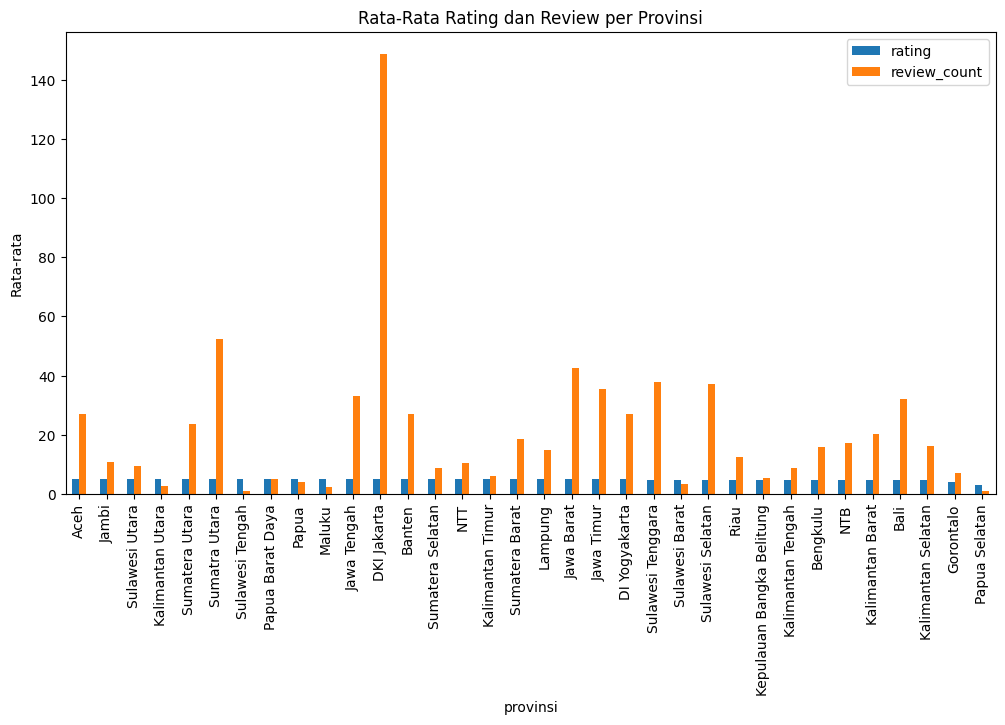

In [79]:
df.groupby('provinsi')[['rating', 'review_count']].mean().sort_values('rating', ascending=False).plot(
    kind='bar', figsize=(12, 6), title='Rata-Rata Rating dan Review per Provinsi'
)
plt.ylabel('Rata-rata')
plt.show()


### Peta Persebaran Klinik (Longitude & Latitude)

In [80]:
df['latitude'] = df['latitude'].str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].str.replace(',', '.').astype(float)

C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_22644\4053031807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'] = df['latitude'].str.replace(',', '.').astype(float)
C:\Users\RIZA ANWAR FADIL\AppData\Local\Temp\ipykernel_22644\4053031807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'] = df['longitude'].str.replace(',', '.').astype(float)


In [81]:
import folium
from folium.plugins import MarkerCluster

# Inisialisasi peta
m = folium.Map(location=[-2.5489, 118.0149], zoom_start=5)  # Koordinat Indonesia tengah
marker_cluster = MarkerCluster().add_to(m)

# Tambahkan marker
for i, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        tooltip=row['provinsi']
    ).add_to(marker_cluster)

m.save('persebaran_klinik.html')


### Top Kategori Terpopuler

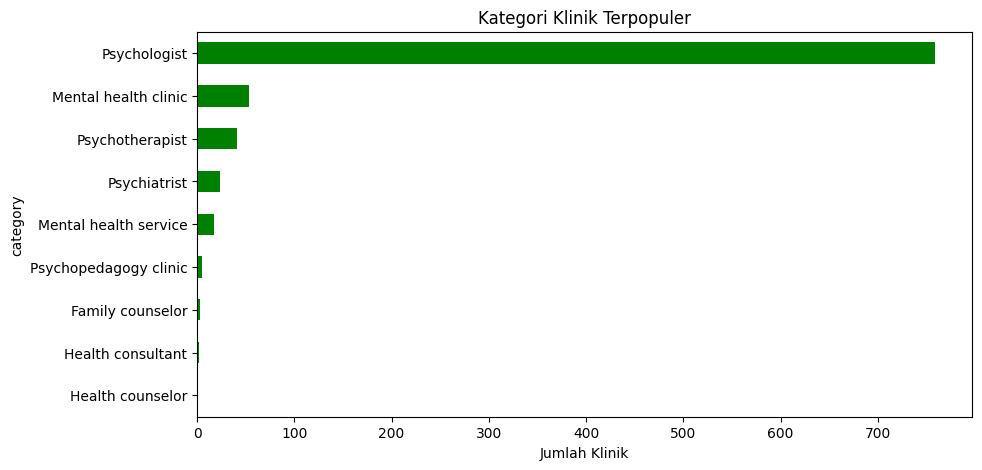

In [82]:
plt.figure(figsize=(10, 5))
df['category'].value_counts().plot(kind='barh', color='green')
plt.title('Kategori Klinik Terpopuler')
plt.xlabel('Jumlah Klinik')
plt.gca().invert_yaxis()
plt.show()


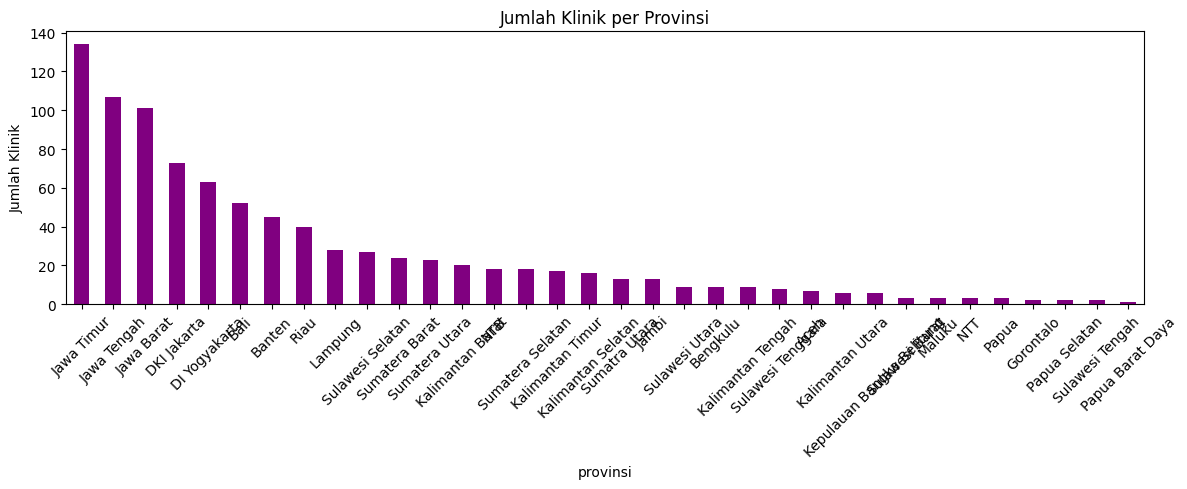

In [83]:
plt.figure(figsize=(12, 5))
df['provinsi'].value_counts().plot(kind='bar', color='purple')
plt.title('Jumlah Klinik per Provinsi')
plt.ylabel('Jumlah Klinik')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Korelasi Rating dan Review Count

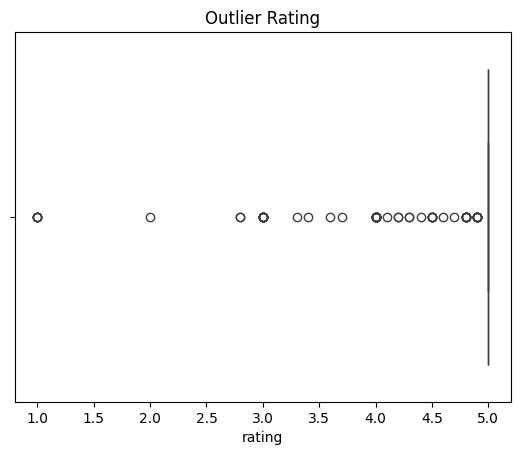

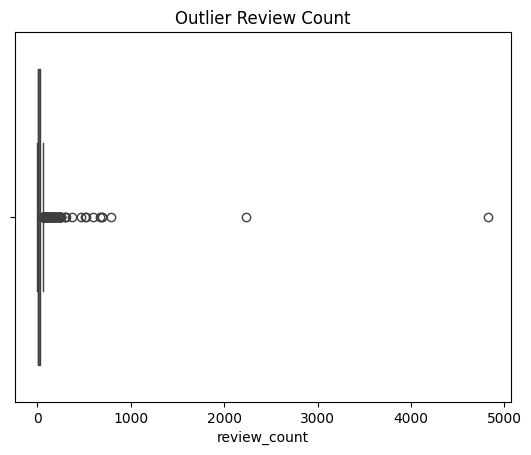

In [84]:
sns.boxplot(x=df['rating'])
plt.title('Outlier Rating')
plt.show()

sns.boxplot(x=df['review_count'])
plt.title('Outlier Review Count')
plt.show()

In [85]:
jumlah_klinik_per_provinsi = df['provinsi'].value_counts().sort_values(ascending=False)

print(jumlah_klinik_per_provinsi)

provinsi
Jawa Timur                   134
Jawa Tengah                  107
Jawa Barat                   101
DKI Jakarta                   73
DI Yogyakarta                 63
Bali                          52
Banten                        45
Riau                          40
Lampung                       28
Sulawesi Selatan              27
Sumatera Barat                24
Sumatera Utara                23
Kalimantan Barat              20
NTB                           18
Sumatera Selatan              18
Kalimantan Timur              17
Kalimantan Selatan            16
Sumatra Utara                 13
Jambi                         13
Sulawesi Utara                 9
Bengkulu                       9
Kalimantan Tengah              9
Sulawesi Tenggara              8
Aceh                           7
Kalimantan Utara               6
Kepulauan Bangka Belitung      6
Sulawesi Barat                 3
Maluku                         3
NTT                            3
Papua                          3
G

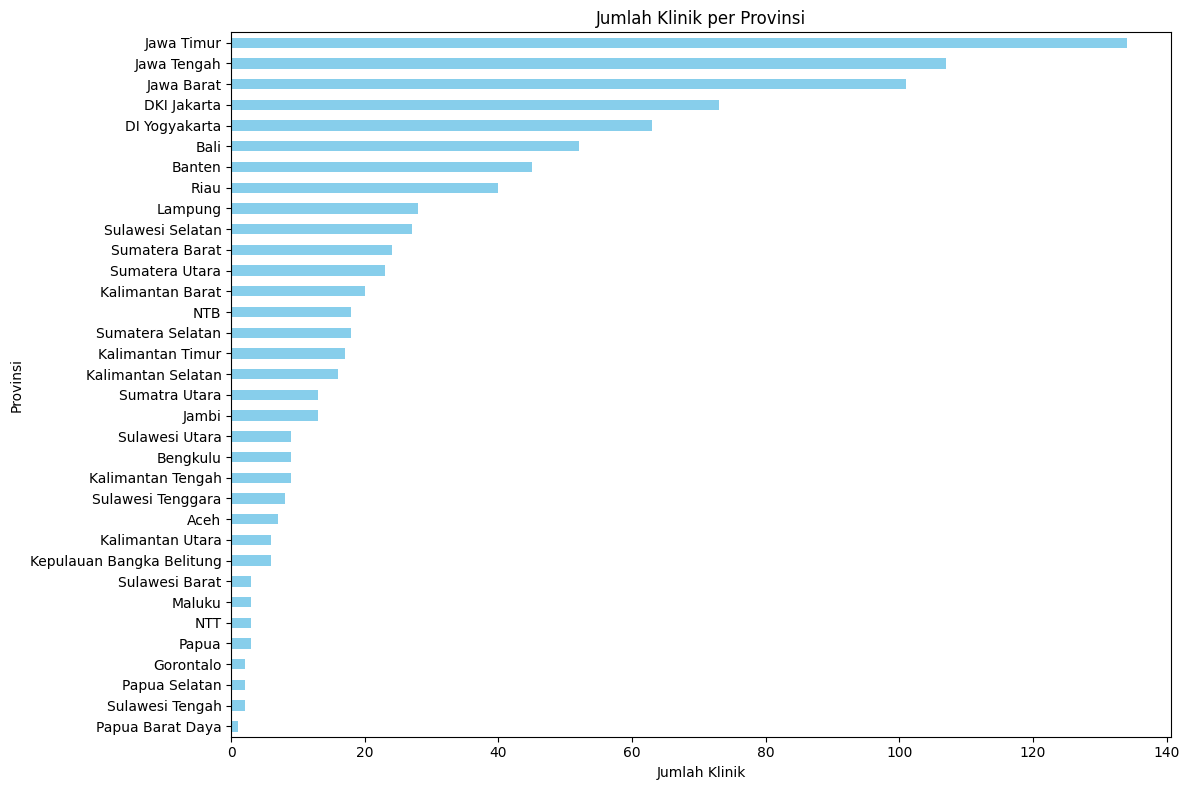

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
jumlah_klinik_per_provinsi.plot(kind='barh', color='skyblue')
plt.xlabel('Jumlah Klinik')
plt.ylabel('Provinsi')
plt.title('Jumlah Klinik per Provinsi')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          905 non-null    object 
 1   category      905 non-null    object 
 2   addres_full   905 non-null    object 
 3   website       905 non-null    object 
 4   phone_number  905 non-null    object 
 5   rating        628 non-null    float64
 6   review_count  905 non-null    float64
 7   longitude     905 non-null    float64
 8   latitude      905 non-null    float64
 9   provinsi      905 non-null    object 
dtypes: float64(4), object(6)
memory usage: 77.8+ KB


In [88]:
df.to_csv('data_final.csv', index=False)